# Gold Price Prediction using Machine Learning

This project demonstrates how to use machine learning to predict gold prices based on historical data. It involves:

- Exploratory Data Analysis (EDA)
- Correlation analysis using heatmaps
- Data preprocessing
- Model training and evaluation (Linear Regression)
- Visualization of actual vs predicted values

The notebook uses Python libraries such as Pandas, NumPy, Seaborn, Matplotlib, and Scikit-learn.

---

## Dataset
The dataset contains historical gold prices along with related features like oil price, stock indices, etc.

---

## Objective
To build a regression model that accurately predicts gold prices and evaluates its performance using metrics like R² score and visual comparisons.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [3]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
correlation = gold_data.corr(numeric_only=True)


<Axes: >

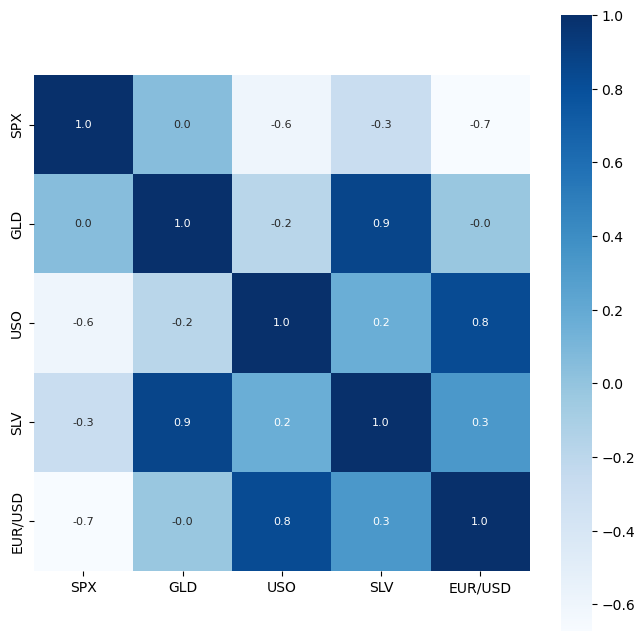

In [13]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues'
)

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


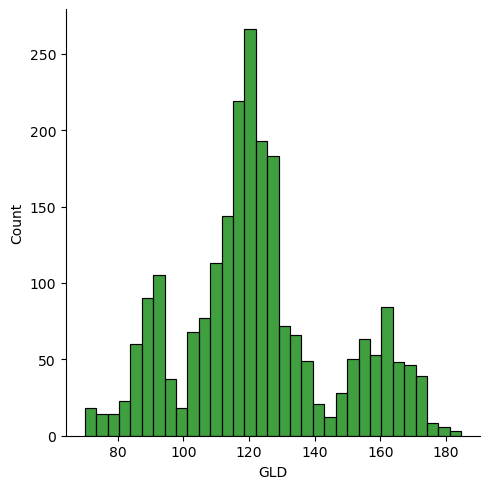

In [15]:
sns.displot(gold_data['GLD'], color = 'green')


In [19]:
x = gold_data.drop(['Date', 'GLD'], axis = 1)
y = gold_data['GLD']

In [20]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)


In [23]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[168.63209903  81.98560005 116.13779983 127.61260073 120.73500156
 154.5625976  150.5843993  126.12499993 117.75999878 126.07370034
 116.81750075 172.07300091 141.1729981  167.83519893 115.04260004
 117.76710067 137.97700316 170.23100106 159.28380261 158.73380011
 155.17060034 125.21449981 175.83729917 156.60230333 125.19800055
  93.77989964  77.68040027 120.50820006 119.06719922 167.5416995
  88.39180039 125.36770039  91.17340087 117.56640019 121.11729916
 136.39200063 115.30660119 114.91270076 147.67190004 107.34960061
 104.15040234  87.16439772 126.50160092 118.15369974 154.48579926
 119.55920022 108.3124001  108.02979797  93.32640031 127.08169775
  74.67730043 113.80299942 121.24759967 111.34479898 118.8495992
 120.74379922 159.5496995  167.04750109 146.75439696  85.61729845
  94.52650023  86.81569922  90.4391     118.85850062 126.47270063
 127.61740007 169.6687002  122.26639898 117.28319892  98.3527
 168.23070191 143.15009818 132.63190289 121.16630201 120.76329949
 119.64590052 11

In [25]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R Squared Error :' , error_score)

R Squared Error : 0.9891608393586534


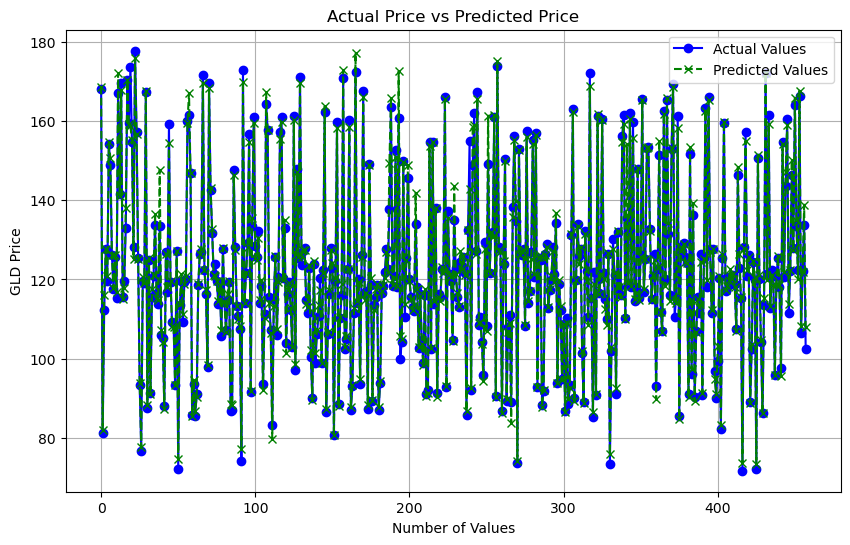

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Values', linestyle='-', marker='o')
plt.plot(test_data_prediction, color='green', label='Predicted Values', linestyle='--', marker='x')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.show()
